<a href="https://colab.research.google.com/github/jsdysw/knn-classifier/blob/master/k_nn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import os
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read dataset
feature vector X = {f1, f2, f3, f4, f5, f6}

class vector C = {"satisfied", "unsatisfied"}

In [15]:
# load satisfaction_data.csv from the local path
directory_data = './'
filename_data = 'satisfaction_data.csv'
df = pd.read_csv(os.path.join(directory_data, filename_data), header=None)
dataset = df.to_numpy() # pandas dataframe -> numpy array

print("Examples of dataset : \n", dataset[0:3])

Examples of dataset : 
 [[40 2 1 86872 25 9 'unsatisfied']
 [40 2 1 259323 54 10 'satisfied']
 [40 2 1 256813 43 14 'satisfied']]


# Data processing (normalize)

In [16]:
tot_data = dataset[:,:6]
label = dataset[:,6]
col_mean = tot_data.sum(axis = 0) / len(tot_data)
col_std = np.std(tot_data, dtype=np.float64, axis = 0)

normalized_tot_data = (tot_data - col_mean)/col_std

dataset[:,:6] = normalized_tot_data

# print("Examples of dataset : \n", dataset[0:3])

# Generate 10 different train/test dataset pairs randomly
train data : test data = 9 : 1

In [17]:
X_dataset = dataset[:,:6]
y_dataset = dataset[:,6]

X_train = []
y_train = []
X_test = []
y_test = []

for i in range(10):
    xtrain, xtest, ytrain, ytest  = train_test_split(X_dataset, y_dataset, test_size=0.1, stratify=y_dataset)
    X_train.append(xtrain)
    y_train.append(ytrain)
    X_test.append(xtest)
    y_test.append(ytest)

# print("Examples of dataset : \n", X_test[0][0:10])

# kNN model
distance between two data is defined as Euclidean(L2 norm)

In [18]:
class KNN:
  def __init__(self, k):
    self.k = k
  
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  # data
  def distance(self, data1, data2) :
    sub = data1 - data2
    dis = np.sum(np.square(sub)) ** 0.5
    # print("data1 : ", data1)
    # print("data2 : ", data2)
    # print("sub", sub)
    # print("dis", dis)
    return dis


  def predict(self, _X_test):
    final_output = []

    for i in range(len(_X_test)):
        # if i % 200 == 0 :
          # print("Loading : ", i/len(_X_test))

        d = []
        votes = []

        for j in range(len(self.X_train)):
            # get distance with every data samples
            dist = self.distance(_X_test[i] , self.X_train[j])
            d.append([dist, j])
        
        d.sort()
        d = d[0:self.k]

        # vote
        for d, j in d:
            votes.append(self.y_train[j])  
        ans = Counter(votes).most_common(1)[0][0]
        final_output.append(ans)
      
    return final_output


# Predict satisfaction with 10 dataset pairs

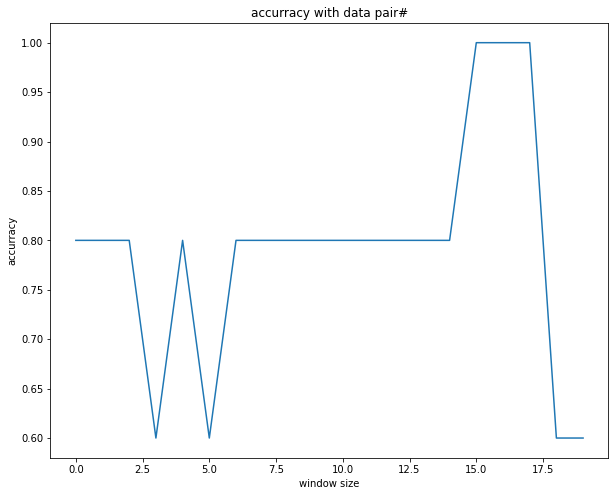

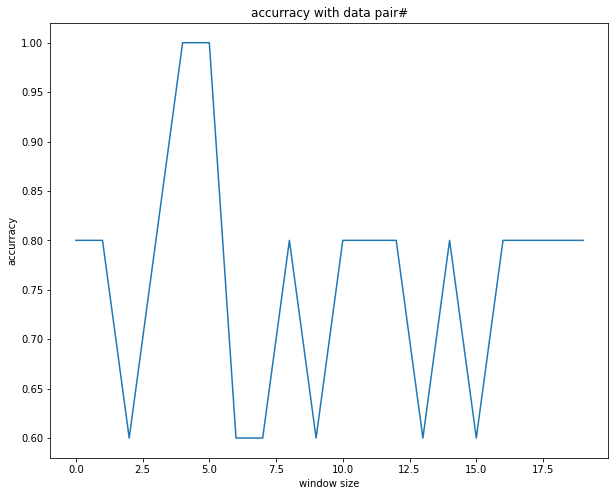

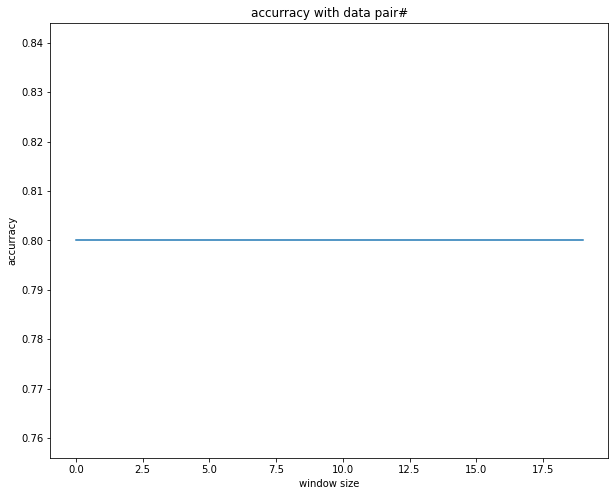

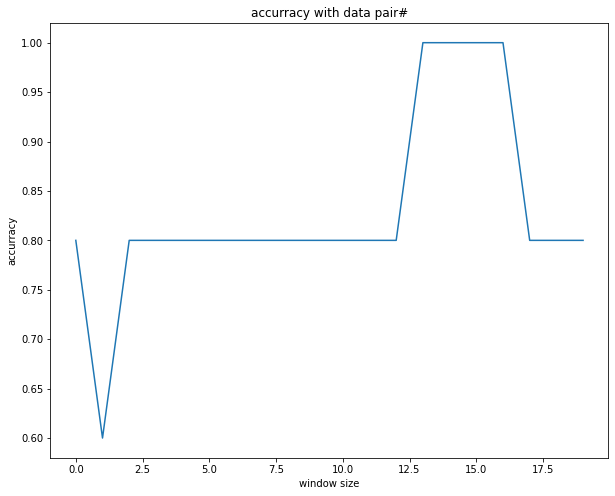

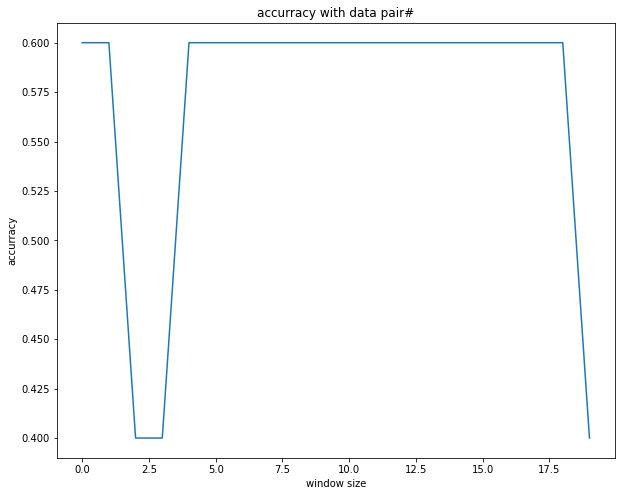

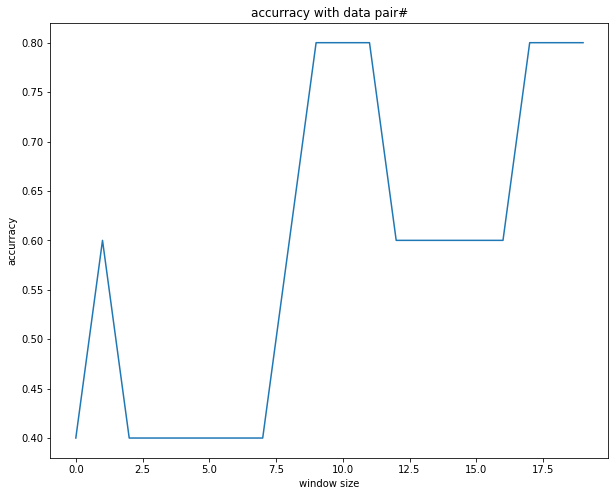

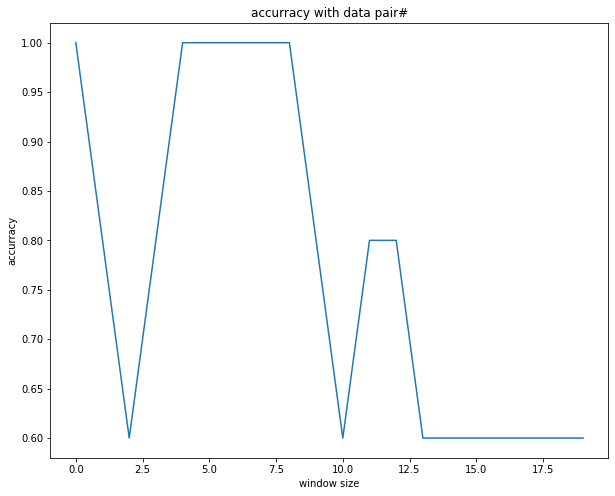

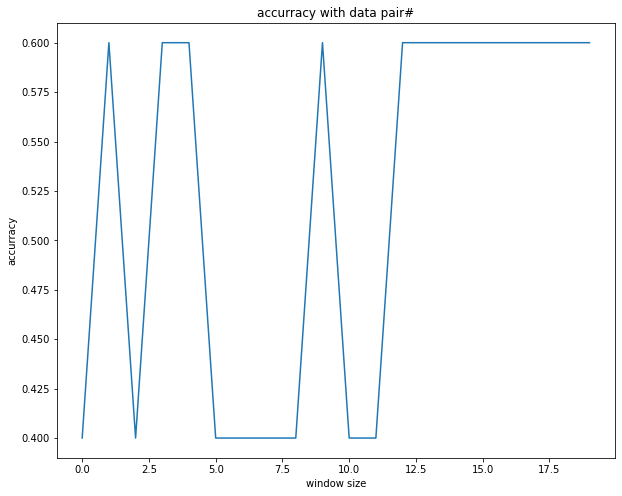

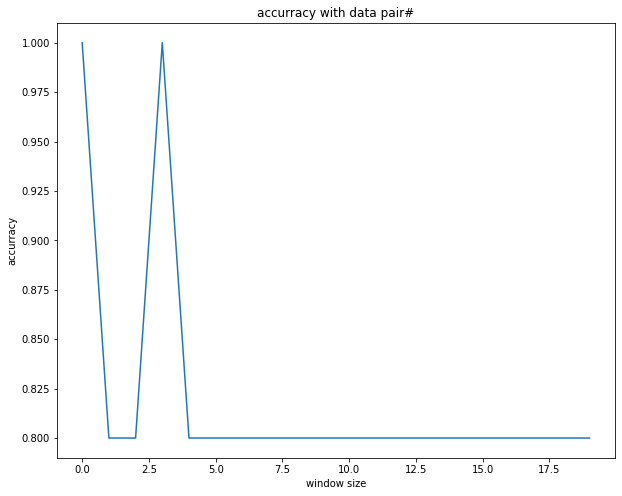

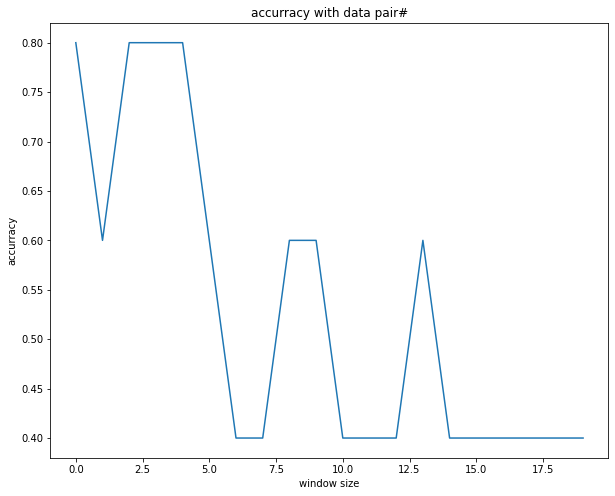

In [21]:
# set k-NN model
# window_size = 5
# clf = KNN(window_size)

num_of_test_input = 2000
num_of_datapairs = 10

for i in range(num_of_datapairs):
    accuracy = []
    
    for ws in range(20):
        window_size = 2*ws + 1
        clf = KNN(window_size)
        
        clf.fit(X_train[i][0:], y_train[i][0:])

        # predict 
        prediction = clf.predict(X_test[i][0:num_of_test_input])
        
        ground_truth = y_test[i][0:num_of_test_input]
        # print(prediction)
        # print(ground_truth)
        # prediction loss
        accuracy_score = np.sum(prediction == ground_truth) / len(ground_truth) 
        accuracy.append(accuracy_score)
        # print("Accuracy_score : ", accuracy_score)
        
    # plot graph
    plt.figure(figsize=(10,8))
    plt.title('accurracy with data pair#')
    plt.xlabel('window size')
    plt.ylabel('accurracy')
    plt.plot(accuracy)

# Test Result